In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [96]:
df = pd.read_csv('../csv/All_Demand.csv', index_col=0)
df = df.drop(['Unnamed: 0.1'], axis=1)
df['Record Date'] = pd.to_datetime(df['Record Date'])
df = df.drop(index=1825)
df = df.sort_values('Record Date')
df = df.set_index("Record Date")
df1 = df[['Total Demand']].copy()
df1 =  df1.interpolate()
df1 = df1[1:]
df1

,Total Demand
Record Date,
2018-01-02,61336.0
2018-01-03,62174.0
2018-01-04,62063.0
2018-01-05,61359.0
2018-01-06,58766.0
...,...
2021-12-27,57385.0
2021-12-28,56398.0
2021-12-29,54512.0


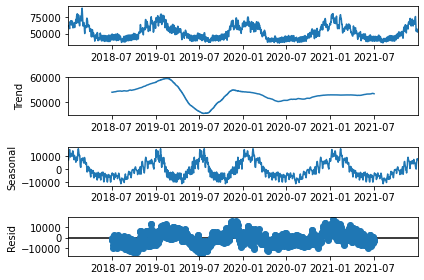

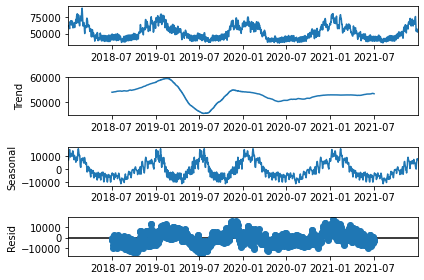

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 

result = seasonal_decompose(df1, model='additive', period=365)
result.plot()

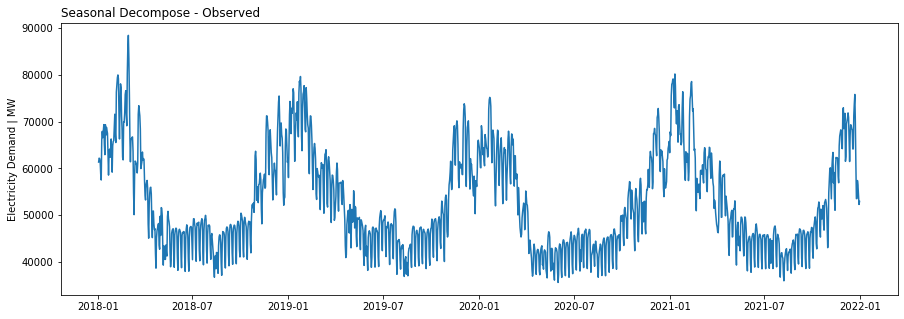

In [107]:
plt.figure(figsize=(15, 5))
plt.title("Seasonal Decompose - Observed", loc = 'left')

plt.plot(result.observed)

plt.ylabel("Electricity Demand | MW")
plt.show()

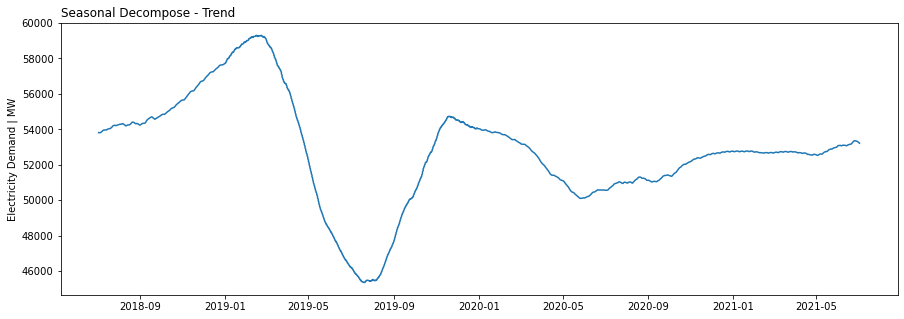

In [108]:
plt.figure(figsize=(15, 5))
plt.title("Seasonal Decompose - Trend", loc = 'left')

plt.plot(result.trend)

plt.ylabel("Electricity Demand | MW")

plt.show()

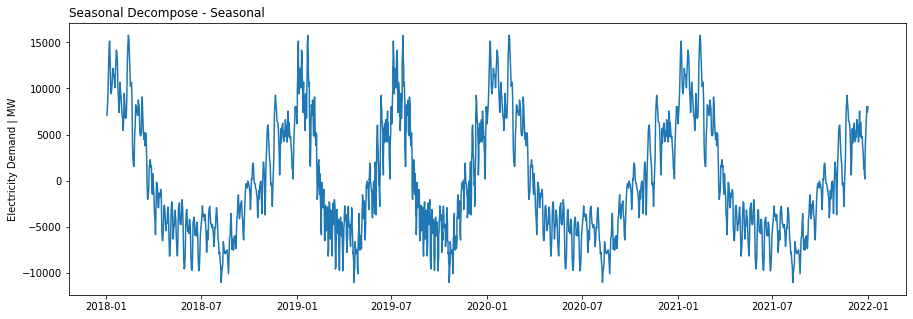

In [109]:
plt.figure(figsize=(15, 5))
plt.title("Seasonal Decompose - Seasonal", loc = 'left')

plt.plot(result.seasonal)

plt.ylabel("Electricity Demand | MW")
plt.show()

/Users/daniilsaleksasins/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_

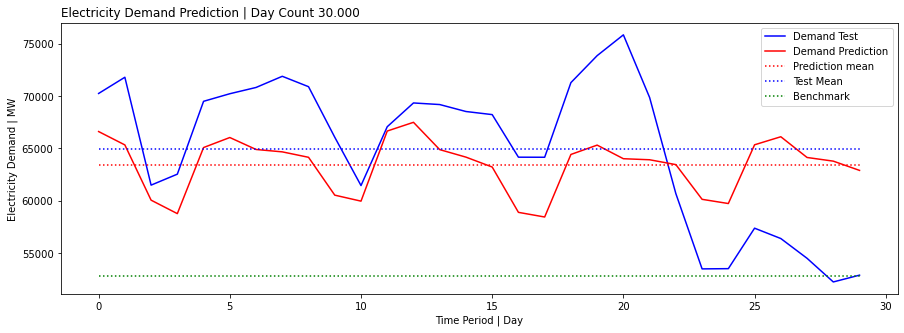

Test mean: 64980.600
Predictions mean: 63435.705
Total mean: 52859.383
Mean Squared Error: 6499.069
Mean Absolute Error: 5839.716


In [94]:
#How far in the Future do you want to predict
#Further you go the least precises the Model prediction will be
Period = 30

X = df1.values
train, test = X[1:len(X)-Period], X[len(X)-Period:]
mean = []
mean2 = []
mean3 = []

# autoregression
model = AR(train)
model_fit = model.fit()

# predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# creating mean array to plot it
# Mean of the testing
for i in range(len(test)):
    mean.append(predictions.mean())
    mean2.append(test.mean())
    mean3.append(df1.values.mean())

plt.figure(figsize=(15, 5))
plt.title("Electricity Demand Prediction | Day Count %.3f" % Period, loc = 'left')

plt.plot(test, color='blue', label='Demand Test')
plt.plot(predictions, color='red', label = 'Demand Prediction')

plt.plot(mean, color='red', label='Prediction mean', linestyle=':')
plt.plot(mean2, color='blue', label='Test Mean', linestyle=':')
plt.plot(mean3, color='green', label='Benchmark', linestyle=':')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show()

print("Test mean: %.3f" % test.mean())
print("Predictions mean: %.3f" % predictions.mean())
print("Total mean: %.3f" % df1.values.mean())

rmse = mean_squared_error(test, predictions, squared=False)
print('Mean Squared Error: %.3f' % rmse)

mae = mean_absolute_error(test, predictions)
print('Mean Absolute Error: %.3f' % mae)